#### 시계열데이터 
- type
    - 년도 표시(4자리수) : %Y
    - 년도 표시(2자리수) : %y
    - 월을 숫자로 표시 : %m
    - 월의 이름을 표시 : %B
    - 월의 이름을 축약해서 표시 : %b
    - 일을 숫자로 표시 : %d
    - 시를 24시 기준으로 표시 : %H
    - 시를 12시 기준으로 표시 : %I
    - AM/PM을 표시 : %p
    - 분을 숫자로 표시 : %M
    - 초를 숫자로 표시 : %S
    - 요일을 이름으로 표시 : %A
    - 요일을 축약해서 이름으로 표시 : %a
    - 요일을 숫자로 표시 : %w ( 0 : 일, ... , 6 : 토 )

In [1]:
from datetime import datetime

In [2]:
time_text = '2025-03-07'

In [3]:
type(time_text)

str

In [4]:
# 문자열데이터를 시계열 데이터로 변경
time_data = datetime.strptime(time_text, '%Y-%m-%d')
print(time_data)
print(time_text)

2025-03-07 00:00:00
2025-03-07


In [5]:
print(type(time_data))

<class 'datetime.datetime'>


In [6]:
# 시계열 데이터를 문자열 데이터로 변경
time_data.strftime('%y/%m/%d')

'25/03/07'

In [7]:
time_data.strftime('%m월')

'03월'

In [8]:
time_data.strftime('%w')

'5'

In [9]:
time_data.strftime('%a')

'Fri'

In [10]:
import pandas as pd

In [11]:
# pandas에서 제공하는 시계열 데이터
pd.Timestamp(100000) # 나노초 단위로 시간을 구한다.

Timestamp('1970-01-01 00:00:00.000100')

In [12]:
pd.Timestamp(100, unit='D')

Timestamp('1970-04-11 00:00:00')

In [13]:
pd.Timestamp('98-03-07')

Timestamp('1998-03-07 00:00:00')

In [14]:
pd.Timestamp('2016-01')

Timestamp('2016-01-01 00:00:00')

In [15]:
time_data2 = pd.to_datetime('2025년03월07일', format='%Y년%m월%d일')

In [16]:
time_data3 = pd.Timestamp(1, unit='D')

In [17]:
time_data2 - time_data3

Timedelta('20153 days 00:00:00')

In [18]:
pd.Timedelta("3 days")

Timedelta('3 days 00:00:00')

In [19]:
time_data2 - pd.Timedelta('3 days')

Timestamp('2025-03-04 00:00:00')

In [20]:
time_data2 - pd.Timedelta(days=30)

Timestamp('2025-02-05 00:00:00')

In [21]:
corona = pd.read_csv("../../csv/corona.csv")

In [22]:
corona.head()

,Unnamed: 0,createDt,deathCnt,decideCnt,seq,stateDt,stateTime,updateDt,accExamCnt,accDefRate
0,0,2022-06-08 09:09:05.982,24305,18188200,904,20220608,00:00,NaN,NaN,NaN
1,1,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN
2,2,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
3,3,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
4,4,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN


In [23]:
# 요일별 평균 일일 확진자의 수가 가장 큰 요일은 언제인가?
# 사용할 컬럼들만 추출하여 변수에 저장
df = corona[["stateDt","decideCnt"]]

In [24]:
df.head()

,stateDt,decideCnt
0,20220608,18188200
1,20220607,18174842
2,20220606,18168670
3,20220605,18163648
4,20220604,18153814


In [25]:
# 일일확진자 컬럼을 생성
df2 = df.copy()

In [26]:
df2.sort_values(['stateDt'],inplace=True)

In [27]:
df2.reset_index(drop=True, inplace=True)

In [28]:
df2['일일확진자'] = (df2['decideCnt'] - df2['decideCnt'].shift()).fillna(0)

In [29]:
df2.describe()

,stateDt,decideCnt,일일확진자
count,8.200000e+02,8.200000e+02,820.000000
mean,2.020897e+07,1.913097e+06,22171.569512
std,7.118265e+03,4.857030e+06,71013.844067
min,2.020031e+07,7.513000e+03,0.000000
25%,2.020100e+07,2.393525e+04,125.000000
50%,2.021042e+07,1.185640e+05,634.000000
75%,2.021112e+07,3.979915e+05,2782.750000
max,2.022061e+07,1.818820e+07,621204.000000


In [30]:
df2.loc[df2['일일확진자'] < 0]

,stateDt,decideCnt,일일확진자


In [31]:
# 기준일 데이터가 내림차순일때
df['일일확진자'] = df['decideCnt'].diff(-1).fillna(0)

/var/folders/r7/wm80f9fd57g6h8jt36r8dgwh0000gn/T/ipykernel_43029/320184068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['일일확진자'] = df['decideCnt'].diff(-1).fillna(0)


In [32]:
df2['일일확진자'].describe()

count       820.000000
mean      22171.569512
std       71013.844067
min           0.000000
25%         125.000000
50%         634.000000
75%        2782.750000
max      621204.000000
Name: 일일확진자, dtype: float64

In [33]:
df['일일확진자'].describe()

count       820.000000
mean      22171.569512
std       71013.844067
min           0.000000
25%         125.000000
50%         634.000000
75%        2782.750000
max      621204.000000
Name: 일일확진자, dtype: float64

In [34]:
# 기준일 데이터를 시계열 데이터로 변경
# df.info()
df['stateDt'] = pd.to_datetime(df['stateDt'],format = '%Y%m%d')

/var/folders/r7/wm80f9fd57g6h8jt36r8dgwh0000gn/T/ipykernel_43029/2870694849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stateDt'] = pd.to_datetime(df['stateDt'],format = '%Y%m%d')


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   stateDt    820 non-null    datetime64[ns]
 1   decideCnt  820 non-null    int64         
 2   일일확진자      820 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 19.3 KB


In [36]:
# 반복문을 이용해서 시계열 데이터의 요일을 출력하는 방법
week_list = []
# for i in range( len(df) ):
for i in df.index:
    week_data = datetime.strftime(df.loc[i, 'stateDt'], format = '%w')
    week_list.append(week_data)
print(week_list)

['3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0', '6', '5', '4', '3', '2', '1', '0',

In [37]:
# map()
list1 = [10, 20, 30, 40]

# for i in list1:
#     print(i)
list(map(
    lambda x : x ** 2,
    list1
))

[100, 400, 900, 1600]

In [38]:
# list1 데이터에서 값이 25 미만이면 'a' 25이상이면 'b' 변경하는 방법
res = []
for i in list1:
    # i : list1의 각 원소들 대입
    if i < 25 :
        res.append('a')
    else:
        res.append('b')
res

['a', 'a', 'b', 'b']

In [39]:
# 일반함수 + map
def func_1(x):
    if x < 25:
        return 'a'
    else:
        return 'b'
    

list(
    map(
        func_1,
        list1
    )
)

['a', 'a', 'b', 'b']

In [40]:
# 참인 경우 값 if 조건식 else 거짓일경우 값
list(
    map(
        lambda x : 'a' if x < 25 else 'b',
        list1
    )
)

['a', 'a', 'b', 'b']

In [41]:
df['요일'] = df['stateDt'].map(
    lambda x : x.strftime('%w')
)

/var/folders/r7/wm80f9fd57g6h8jt36r8dgwh0000gn/T/ipykernel_43029/2933155251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['요일'] = df['stateDt'].map(


In [42]:
df.head()

,stateDt,decideCnt,일일확진자,요일
0,2022-06-08,18188200,13358.0,3
1,2022-06-07,18174842,6172.0,2
2,2022-06-06,18168670,5022.0,1
3,2022-06-05,18163648,9834.0,0
4,2022-06-04,18153814,12039.0,6


In [43]:
# 요일컬럼의 데이터를 숫자형태에서 문자형태(월,...,일) 변경
# for
week_list = []
# for i in range(df):
for i in df.index:
    # 요일 컬럼의 데이터가 0이라면 일 1이라면 월, .... , 6이라면 토
    if df.loc[i, '요일'] == '0':
        week_list.append('일')
    elif df.loc[i, '요일'] == '1':
        week_list.append('월')
    elif df.loc[i, '요일'] == '2':
        week_list.append('화')
    elif df.loc[i, '요일'] == '3':
        week_list.append('수')
    elif df.loc[i, '요일'] == '4':
        week_list.append('목')
    elif df.loc[i, '요일'] == '5':
        week_list.append('금')
    else:
        week_list.append('토')
print(week_list)

# while
# 딕셔너리 생성
dict_week = {
    '1' : '월',
    '2' : '화',
    '3' : '수',
    '4' : '목',
    '5' : '금',
    '6' : '토',
    '0' : '일'
}
# 초기값 생성
i = 0
week_list2 = []
while i < len(df):
    # dict_week 데이터에서 필요한 키값을 df의 요일 컬럼에서 추출
    dict_key = df.iloc[i, -1]
    week_list2.append(dict_week[dict_key])
    i += 1
print(week_list2)

# print(week_list == week_list2)
# map + 일반함수
def change_week(x):
    # x에 들어오는 데이터는? -> df의 요일 컬럼의 데이터 하나씩 대입
    return dict_week[x]

print(df['요일'].map(
    change_week
))

# map + lambda
week_list = ['일', '월', '화', '수', '목', '금', '토']
df['요일'].map(
    lambda x : week_list[int(x)]
)

['수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일', '토', '금', '목', '수', '화', '월', '일',

0      수
1      화
2      월
3      일
4      토
      ..
815    토
816    금
817    목
818    수
819    화
Name: 요일, Length: 820, dtype: object

In [44]:
df['요일'] = df['요일'].map(
    lambda x : week_list[int(x)]
)

/var/folders/r7/wm80f9fd57g6h8jt36r8dgwh0000gn/T/ipykernel_43029/450491931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['요일'] = df['요일'].map(


In [45]:
# 특정 인덱스를 제거
df.drop(819, axis=0, inplace = True)

/var/folders/r7/wm80f9fd57g6h8jt36r8dgwh0000gn/T/ipykernel_43029/3123935264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(819, axis=0, inplace = True)


In [52]:
group_data = df.groupby('요일')[['일일확진자']].mean()

In [53]:
group_data.sort_values('일일확진자', ascending=False, inplace=True)

In [54]:
import matplotlib.pyplot as plt

In [57]:
# 폰트 설정
import platform

In [58]:
platform.system()

'Darwin'

In [66]:
# 만약에 os가 mac이라면
if platform.system() == 'Darwin':
    plt.rc('font', family= 'AppleGothic')
else:
    plt.rc('font', family= 'Malgun Gothic')

<Axes: xlabel='요일'>

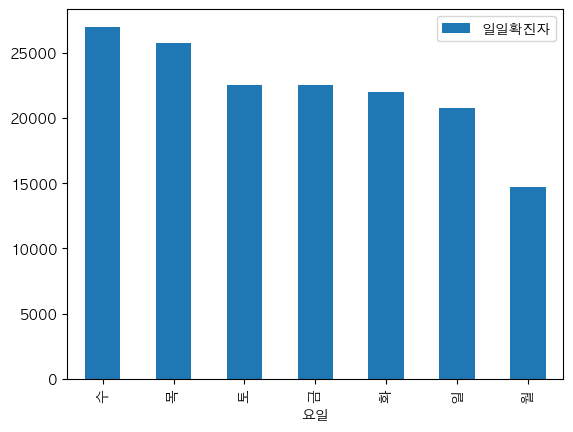

In [67]:
# 그래프 시각화 과정에서 한글이 출력에서 문제 발생
group_data.plot(kind = 'bar')